<a href="https://colab.research.google.com/github/Fahlevi20/Machine-Learning-Terapan---Data-Analytics/blob/main/Submission1_Machine_Learning_Terapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

Mengimport Library untuk melakukan Exploratory Data Analisis

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from io import BytesIO
import requests
import plotly.express as px

# Import Kaggle

In [ ]:
pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alpiansyahrizqi","key":"4ec2871806d4a125d51415bdc1e5a75a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d adityadesai13/used-car-dataset-ford-and-mercedes

  0% 0.00/1.10M [00:00<?, ?B/s]
100% 1.10M/1.10M [00:00<00:00, 36.9MB/s]


In [ ]:
!unzip /content/used-car-dataset-ford-and-mercedes.zip

Archive:  /content/used-car-dataset-ford-and-mercedes.zip
  inflating: audi.csv                
  inflating: bmw.csv                 
  inflating: cclass.csv              
  inflating: focus.csv               
  inflating: ford.csv                
  inflating: hyundi.csv              
  inflating: merc.csv                
  inflating: skoda.csv               
  inflating: toyota.csv              
  inflating: unclean cclass.csv      
  inflating: unclean focus.csv       
  inflating: vauxhall.csv            
  inflating: vw.csv                  


# IMPORT DATASET

In [19]:
df=pd.read_csv('vw.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


# EXPLORATORY DATA ANALYSIS (EDA) & DATA CLEANING

Disini saya melakukan Eksplorasi Data Analyis (EDA) dan Data Cleaning untuk memeriksa dataset yang akan saya training. Tujuannya adalah untuk melihat isi dari dataset tersebut apakah ada yang perlu dibuang atau tidak, apakah ada NaN, melihat tipe datanya, melihat jumlah kolom dan baris dan lainnya.

In [20]:
print('===================EXPLORATORY DATA ANALYSIS=================================')
long_string='========================================================================'
def printByInformation(dataset, option=False):
  if option:
    pd.set_option('display.max_columns',None)
    print(f'current col:{dataset.shape[0]}')
    print(f'current rows:{dataset.shape[1]}')
    print(long_string)
    print('======================DATA CLEANING=======================================')
    print(f'jumlah NaN {dataset.isnull().sum().sum()} dari NaN yg ditemukan')
    print(long_string)
    print(f'jumlah NaN tiap Column\n{dataset.isnull().sum()}')
    print(long_string)
    print(f'Name Columns: {list(dataset.columns)}')
    print(long_string)
    print(f'{dataset.info()}')
    print(long_string)
    print(f'{dataset.describe()}')
printByInformation(df,True)
  

===================EXPLORATORY DATA ANALYSIS=================================
current col:15157
current rows:9
======================DATA CLEANING=======================================
jumlah NaN 0 dari NaN yg ditemukan
jumlah NaN tiap Column
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
Name Columns: ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15

In [21]:
df.head()#melihat 5 data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


# MEMERIKSA DATA YANG UNIK

melihat data Unique untuk mempermudah nanti saat melakukan analisis data dan juga preprocessing 

In [22]:
df['model'].unique()

array([' T-Roc', ' Golf', ' Passat', ' T-Cross', ' Polo', ' Tiguan',
       ' Sharan', ' Up', ' Scirocco', ' Beetle', ' Caddy Maxi Life',
       ' Caravelle', ' Touareg', ' Arteon', ' Touran', ' Golf SV',
       ' Amarok', ' Tiguan Allspace', ' Shuttle', ' Jetta', ' CC',
       ' California', ' Caddy Life', ' Caddy', ' Caddy Maxi', ' Eos',
       ' Fox'], dtype=object)

In [23]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [24]:
df['fuelType'].unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid'], dtype=object)

# DATA VISUALIZATION

melakukan visualisasi data untuk mempermudah membaca data dari segi bentuk visual sehingga lebih mudah dalam menganalisis data

Summary from column : transmission
Column type : object
NaN  : 0 From 15157 Observations
Unique Labels 
['Automatic' 'Manual' 'Semi-Auto']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


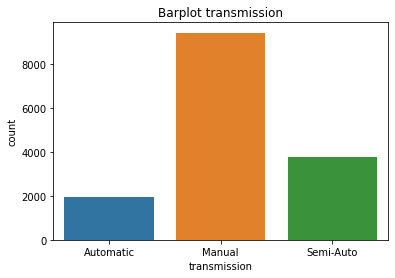

Informasi General Dataset ...
count      15157
unique         3
top       Manual
freq        9417
Name: transmission, dtype: object


In [36]:
def identifyColumns(dataset,column,scatterPlot=False):
	print(f"Summary from column : {column}")
	print(f"Column type : {dataset[column].dtype}")
	print(long_string) 
	print(f"NaN  : {dataset[column].isna().sum()} From {len(dataset[column].values)} Observations")
	print(f"Unique Labels \n{dataset[column].unique()}")
	print(long_string)
	if(len(dataset[column].unique()) > 10):
		top10 = dataset[column].value_counts().head(10)
		sns.countplot(dataset[dataset[column].isin(top10.index)][column],label=column)
		plt.title(f"Barplot {column} Top 10")
		plt.show()
	else:
		sns.countplot(dataset[column],label=column)
		plt.title(f"Barplot {column}")
		plt.show()
	print(long_string)	
	print("Informasi General Dataset ...")
	print(df[column].describe())
	print(long_string)

	if(scatterPlot and dataset[column].dtype != 'object'):
		fig = go.Figure()
		fig.add_traces(go.Scatter(x = dataset[column],y=np.linspace(0,1,len(dataset[column].values)),mode='markers',name=column))
		fig.update_layout(title=f"Scatter Plot {column}",xaxis_title=column,
		yaxis_title='Range Values',height= 500,width=800)
		fig.show()
	
		 
identifyColumns(df, "transmission",True)
# Apabila liat Unbalanced , Coba buat dataset yang proporsi nya sama , File csv/excel dibedain 
# Gunakan Stratified CrossValidation

Insight yang saya dapatkan disini yaitu:
* lebih banyak yang menggunakan Manual transmission dibanding menggunakan Semi-Auto dan juga Automatic
* pengguna Automatic paling sedikit digunakan
* lebih banyak yang menggunakan Semi-Auto ketimbang Automatic

Summary from column : fuelType
Column type : object
NaN  : 0 From 15157 Observations
Unique Labels 
['Diesel' 'Petrol' 'Other' 'Hybrid']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


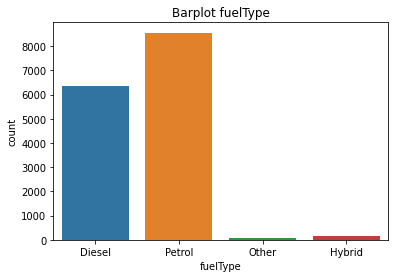

Informasi General Dataset ...
count      15157
unique         4
top       Petrol
freq        8553
Name: fuelType, dtype: object


In [37]:
def identifyColumns(dataset,column,scatterPlot=False):
	print(f"Summary from column : {column}")
	print(f"Column type : {dataset[column].dtype}")
	print(long_string) 
	print(f"NaN  : {dataset[column].isna().sum()} From {len(dataset[column].values)} Observations")
	print(f"Unique Labels \n{dataset[column].unique()}")
	print(long_string)
	if(len(dataset[column].unique()) > 10):
		top10 = dataset[column].value_counts().head(10)
		sns.countplot(dataset[dataset[column].isin(top10.index)][column],label=column)
		plt.title(f"Barplot {column} Top 10")
		plt.show()
	else:
		sns.countplot(dataset[column],label=column)
		plt.title(f"Barplot {column}")
		plt.show()
	print(long_string)	
	print("Informasi General Dataset ...")
	print(df[column].describe())
	print(long_string)

	if(scatterPlot and dataset[column].dtype != 'object'):
		fig = go.Figure()
		fig.add_traces(go.Scatter(x = dataset[column],y=np.linspace(0,1,len(dataset[column].values)),mode='markers',name=column))
		fig.update_layout(title=f"Scatter Plot {column}",xaxis_title=column,
		yaxis_title='Range Values',height= 500,width=800)
		fig.show()
	
		 
identifyColumns(df, "fuelType",True)
# Apabila liat Unbalanced , Coba buat dataset yang proporsi nya sama , File csv/excel dibedain 
# Gunakan Stratified CrossValidation

Insight yang saya dapatkan disini yaitu:
* Bensin Petrol yang paling banyak digunakan
* Bensin Diesel merupakan yang paling banyak kedua.
* yang menggunakan merek bensin lain selain Diesel dan Petrol ataupun Hybrid jarang sekali.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [39]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [49]:
temp=df.groupby('model')['year','price','tax','model'].sum().reset_index()
fig=go.Figure(data=[
    go.Bar(name='price', x=temp['model'],y=temp['price']),
    go.Bar(name='tax', x=temp['model'],y=temp['tax']),
])
fig.update_layout(
width=1000,
height=600,
barmode='stack',
title='Total case over time',
font=dict(size=14,color='#686868'),
xaxis_tickangle=-45,
yaxis=dict(
title='Count'))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Top 3 Mobil Golf, Tiguan dan juga Polo merupakan mobil yang sering digunakan pada kumpulan data dari semua mobil di VW

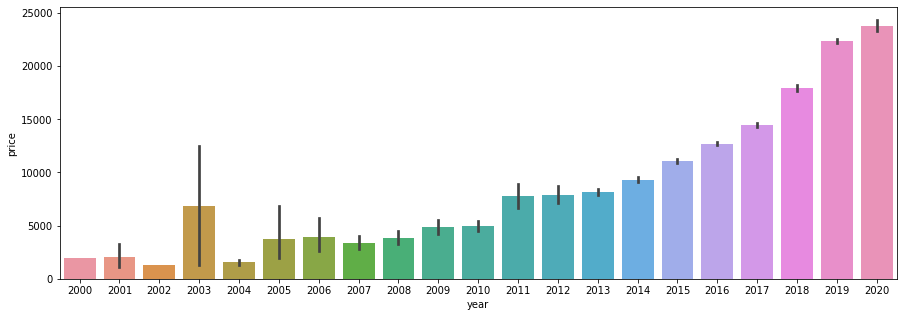

In [52]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = df["year"], y = df["price"])

In [56]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


jika dilihat pada tahun 2019 dan 2020 merupakan tahun yang dimana jumlah pembeli mobil VW terbanyak

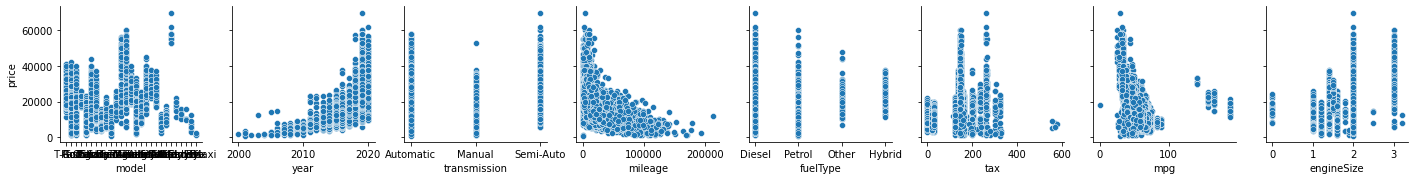

In [62]:
sns.pairplot(df,x_vars=['model','year','transmission','mileage','fuelType','tax','mpg','engineSize'],y_vars=['price'])

disini saya menggunakan pairplot untuk melihat grafik mana yang memiliki kesamaan sehingga akan mempermudah untuk melakukan prediksi

# Feature Engineering

disini saya akan melakukan feature engineering untuk melihat apakah ada data yang dapat dibuat fitur baru sehingga akan memberikan kualitas data yang baik untuk melakukan prediksi

In [65]:
df['age_car']=2020-df['year']
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_car
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,1
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,1
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,1
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,1
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,1
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,8
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,12
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,11
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,14


In [66]:
df=df.drop(columns=['year'])
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_car
0,T-Roc,25000,Automatic,13904,Diesel,145,49.6,2.0,1
1,T-Roc,26883,Automatic,4562,Diesel,145,49.6,2.0,1
2,T-Roc,20000,Manual,7414,Diesel,145,50.4,2.0,1
3,T-Roc,33492,Automatic,4825,Petrol,145,32.5,2.0,1
4,T-Roc,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,1


disini saya mendrop kolom 'year' karena menurut saya jika memakai kolom year akan memberikan efek pada data sehingga membuat kualitas data tersebut tidak sempurna karena dalam bentuk tahun sehingga dengan membuat fitur baru menjadi Age_car akan mempermudah dalam preprocessing dan memberikan kualitas data yang baik juga

# Data Preprocessing

disini saya akan melakukan data preprocessing sehingga data tersebut dapat di training dan akan menghasilkan hasil prediksi yang baik karena banyak sekali data yang harus diolah seperti pada kolom model yang dimana tipe datanya object atau string sehingga perlu diubah ke integer atau ke angka 0 dan 1 agar dapat diprediksi tanpa mendrop kolom tersebut.

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
df_new=pd.get_dummies(df,columns=['model','transmission','fuelType'])
df_new.head()

,price,mileage,tax,mpg,engineSize,age_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Caravelle,model_ Eos,model_ Fox,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


disini saya melakukan get dummies untuk merubah nilai object menjadi kategorikal sehingga dapat di training.

# Normalize

disini saya melakukan normalisasi agar semua nilai seperti nilai nominal, nilai int dan nilai float akan bernilai sama sehingga akan memberikan data yang baik

In [73]:
scaler=StandardScaler()
df_scaler=scaler.fit_transform(df_new)
df_scaler=pd.DataFrame(df_scaler,columns=df_new.columns)
print(df_scaler.shape)

(15157, 40)


In [74]:
df_scaler.head()

,price,mileage,tax,mpg,engineSize,age_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Caravelle,model_ Eos,model_ Fox,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,1.052392,-0.387209,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
1,1.295211,-0.828948,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
2,0.407627,-0.694090,0.508120,-0.245816,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,0.780728,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
3,2.147462,-0.816512,0.508120,-1.557966,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,-0.851661,-0.09828,-0.075981,0.878707
4,0.781591,-0.737309,0.586884,-1.022843,-0.218101,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,-1.280856,1.734874,-0.851661,-0.09828,-0.075981,0.878707


In [75]:
X=df_scaler.drop(columns=['price'])
y=df_scaler['price']

# Modelling and Training

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y)

In [80]:
linreg=LinearRegression()
linreg.fit(X_train,Y_train)
y_pred=linreg.predict(X_test)
print('Slope:',linreg.intercept_)
print('coefficient:',linreg.coef_)
print('nilai score',linreg.score(X_test,Y_test))


Slope: -0.000290571964837159
coefficient: [-2.10936555e-01 -7.82697852e-02 -1.52965492e-01  4.25446346e-01
 -3.39443223e-01  4.44273979e+08  6.61041853e+08  3.84531711e+08
  4.11227343e+08  1.03651391e+08  1.19678417e+08  8.46365918e+07
  3.24462549e+08  1.63838555e+08  4.23930193e+08  1.11952603e+08
  8.46365918e+07  2.43233325e+09  6.86718933e+08  2.39167156e+08
  1.24100890e+09  2.14735610e+09  6.53127802e+08  6.76573436e+08
  3.29894231e+08  7.25780087e+08  1.11782470e+09  1.67137513e+09
  4.02530263e+08  7.96663608e+08  7.84791692e+08  1.22113203e+09
 -8.10107560e+09 -1.17108730e+10 -1.04456825e+10  3.50254150e+09
  6.90681467e+08  5.36032073e+08  3.51833584e+09]
nilai score 0.8855092828002151


In [79]:
from sklearn.metrics import r2_score,mean_squared_error

# Conclusion Report

In [82]:
print('mse:',mean_squared_error(Y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(Y_test,y_pred)))
print('r^2:',r2_score(Y_test,y_pred))

mse: 0.10687764322142126
rmse: 0.32692146338443623
r^2: 0.8855092828002151


# Modelling

disini saya mendapatkan score prediksi yang baik yaitu sebesar 0.885 atau 88.5% sehingga masih cukup baik untuk prediksi tetapi itu masih standar sehingga masih banyak yang harus dirubah pada modelling

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR


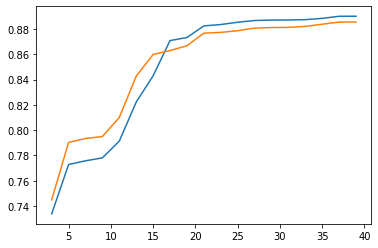

In [86]:
column_names=df_new.drop(columns=['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(3, 40, 2):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, Y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, Y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, Y_train))
    r_squared_test.append(regressor.score(X_test_transformed, Y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

disini saya mencoba untuk menebak berapa jumlah variabel yang terbaik agar dapat menghasilkan prediksi yang baik dan ternyata dengan KBest saya dapat mendapatkan prediksi yang baik dengan 23 variabel yaitu 0.88 seperti dengan pengujian model pertama.

In [87]:
selector = SelectKBest(f_regression, k = 23)
X_train_transformed = selector.fit_transform(X_train, Y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_car', 'model_ Amarok',
       'model_ Arteon', 'model_ Beetle', 'model_ California',
       'model_ Caravelle', 'model_ Polo', 'model_ Sharan', 'model_ T-Roc',
       'model_ Tiguan', 'model_ Tiguan Allspace', 'model_ Touareg',
       'model_ Up', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [90]:
def regression_model(model):
    regressor = model
    regressor.fit(X_train_transformed, Y_train)
    score = regressor.score(X_test_transformed, Y_test)
    return regressor, score

# Prediction

In [91]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.877321
1,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.877327
2,Linear,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",-0.000003
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.935133
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.947823
5,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.937424


disini saya mencoba untuk prediksi dengan menggunakan banyak model dan ternyata model tertinggi didapatkan oleh DecisionTreeRegressor dengan score tertinggi 0.947823

(11367, 820)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univari

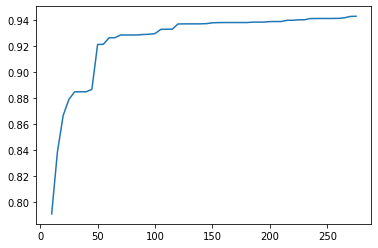

In [92]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

no_of_features = []
r_squared = []

for k in range(10, 277, 5):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, Y_train)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, Y_train)
    no_of_features.append(k)
    r_squared.append(regressor.score(X_train_transformed, Y_train))
    
sns.lineplot(x = no_of_features, y = r_squared)

disini saya ingin mencoba dengan polynomial features sebagai preprocesingnya dan ternyata dengan polynomial memberikan akurasi yang besaryaitu 0.94 dengan dengan K sekitar 110 an dan disini saya mencoba dengan K=110

In [93]:
selector = SelectKBest(f_regression, k = 110)
X_train_transformed = selector.fit_transform(X_train_transformed_poly, Y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide



# Conclusion

In [94]:
models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.877321
1,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.877327
2,Linear,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",-0.000003
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.935133
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.947823
5,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.937424
6,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.927868
7,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.927858
8,Polynomial,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.131455
9,Polynomial,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.931676


Dengan menggunakan Polynomial terbukti memberikan hasil yang terbaik yaitu sebesar 0.951851 dengan begitu, hasil prediksi saya akan memberikan prediksi yang baik karena sudah diatas 93% yaitu 95%